$m_{k+1} = m_{k} - (J_{k}^{T} J_{k} +\lambda I)^{-1} J_{k}^{T} r_{k} $

where 

$ J =  \frac{\partial g}{\partial m}\big\rvert_{m_{0}} $

$ \LARGE{y = 1 - A e^{\frac{-(x-\bar{x})^{2}}{2\sigma^{2}}} }$

$\LARGE{\frac{\partial y}{\partial A} = -e^{\frac{-(x-\bar{x})^{2}}{2\sigma^{2}}}} $

$\LARGE{\frac{\partial y}{\partial \bar{x}} = -A\frac{(x-\bar{x})}{\sigma^{2}}e^{\frac{-(x-\bar{x})^{2}}{2\sigma^{2}}}} $

$\LARGE{\frac{\partial y}{\partial \sigma} = -A\frac{(x-\bar{x})^{2}}{\sigma^{3}}e^{\frac{-(x-\bar{x})^{2}}{2\sigma^{2}}}} $


In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def plotting(x, y, m, xlabel, ylabel, polynomial_degree):
    plt.figure()
    plt.plot(x,y,'x')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} Vs {xlabel}')
    xfine = np.linspace(np.min(x), np.max(x), 10*len(x))
    G = makeG(xfine, polynomial_degree)
    yfine = np.dot(G,m)
    plt.plot(xfine,yfine,'r--')

def makeG(x, m):
    G = np.zeros((len(x), 3))
    exponent = np.exp(-np.power((x - m[1]),2)/(2*np.power(m[2],2)))
    G[:,0] = -exponent
    G[:,1] = -m[0] * (x - m[1]) * exponent / np.power(m[2],2)
    G[:,2] = -m[0] * np.power((x - m[1]),2) * exponent /(np.power(m[2],3))
    return G

def forwardModel(x, m):
    y_hat = 1 - m[0] * np.exp(-np.power((x - m[1]),2)/(2*np.power(m[2],2)))
    return y_hat

def linearInversion(x, y, m, lam):
    G = makeG(x, m)
    Gt = G.T
    GtG = np.dot(Gt, G)
    regularization = lam * np.eye(3)
    GtGinv = np.linalg.inv(GtG + regularization)
    m = np.dot(np.dot(GtGinv, Gt), y)
    return m

def getCost(x, y, m, polynomial_degree):
    G = makeG(x, polynomial_degree)
    yhat = np.dot(G,m)
    cost = np.linalg.norm(y-yhat,2)
    return cost

In [20]:
file = 'G263.7.json'
with open(file, 'r') as f:
    js = json.load(f)

In [21]:
for key in js:
    js[key]['y'] = js[key]['y'] - np.median(js[key]['y']) + 1.0

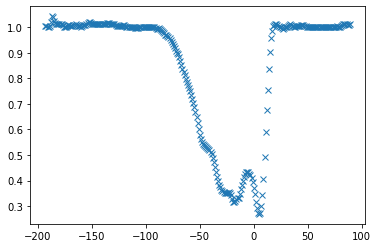

In [22]:
x = np.array(js['average']['x'])
y = np.array(js['average']['y'])
plt.plot(x,y,'x')

In [23]:
index = np.argmin(y)
m = [1.0 - y[index], x[index], 5.0]

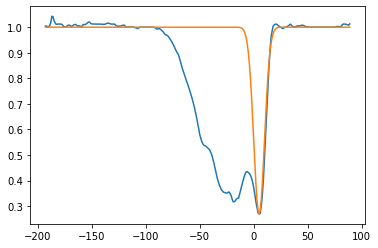

data norm: 4.17775947841889 model norm: 3.2106965794674274


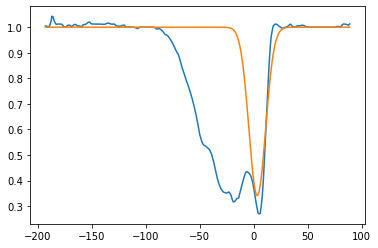

data norm: 3.931773795929121 model norm: 5.412975738955791


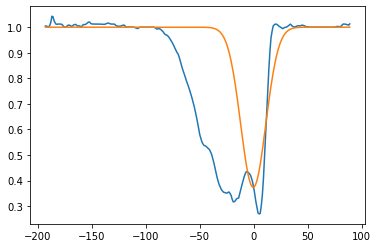

data norm: 3.4532924469931463 model norm: 9.691746268839148


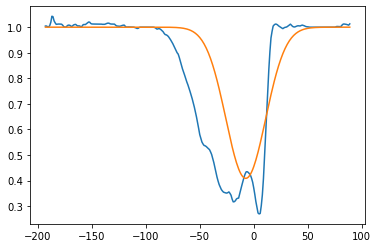

data norm: 2.463055458091226 model norm: 12.33178821598753


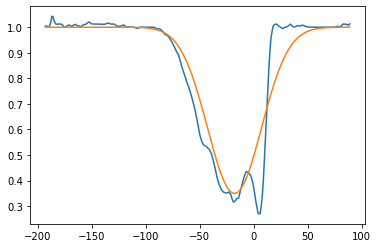

data norm: 1.2703163228589858 model norm: 2.8824812037557264


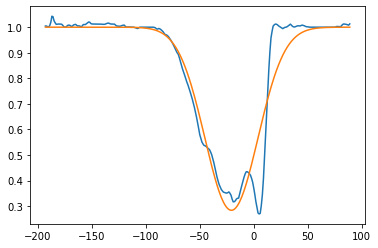

data norm: 1.1562838617586475 model norm: 0.6525078781749227


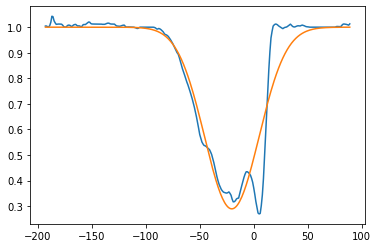

data norm: 1.1539116049738236 model norm: 0.22155656369806875


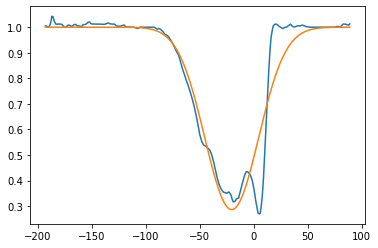

data norm: 1.1536607207327625 model norm: 0.0757537166600958


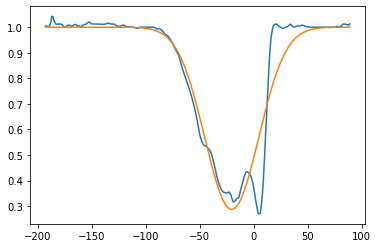

data norm: 1.1536309459905811 model norm: 0.025751146918761906


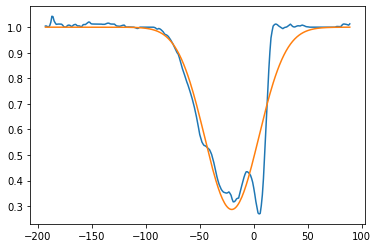

data norm: 1.153627526936144 model norm: 0.008769983232164491


In [24]:
Nepochs = 10
lam = 0.0
for iteration in range(Nepochs):
    y_hat = forwardModel(x, m)
    r = y_hat - y
    dm = linearInversion(x, r, m, lam)
    m -= dm
    plt.plot(x,y)
    plt.plot(x,y_hat);plt.show()
    print(f'data norm: {np.linalg.norm(r,2)} model norm: {np.linalg.norm(dm)}')
    if np.abs(np.linalg.norm(r,2) - norm_history) > 0.01:
        break
    else:
        norm_history = np.linalg.norm(r,2)